**By Rebai Mohamed Younes**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def get_centroids(data, num_clusters, U, m):
    um = U ** m
    return np.dot(um.T, data) / np.sum(um.T, axis=1, keepdims=True)

def fuzzy_c_means_image(image, num_clusters, m, epsilon=0.01, max_iter=100):

    data = image.reshape(-1, image.shape[-1])  # Each pixel is a data point
    n_pixels, n_features = data.shape

    U = np.random.rand(n_pixels, num_clusters)
    U = U / np.sum(U, axis=1, keepdims=True)

    for _ in tqdm(range(max_iter), desc="Fuzzy C-means Iterations"):

        Centroids = get_centroids(data, num_clusters, U, m)

        # Fully vectorized
        dist = np.linalg.norm(data[:, np.newaxis] - Centroids, axis=2)
        dist = np.where(dist == 0, 1e-10, dist)  # No division by zero

        inv_dist = dist ** (-2 / (m - 1))
        new_U = inv_dist / np.sum(inv_dist, axis=1, keepdims=True)  # Update U
        if np.linalg.norm(new_U - U) < epsilon:
            break

        U = new_U

    U_img = U.reshape(image.shape[0], image.shape[1], num_clusters)

    # Create heatmaps
    heatmaps = [U_img[:, :, k] for k in range(num_clusters)]

    return U, Centroids, heatmaps

def visualize_heatmaps_and_clusters(image, heatmaps):

    num_clusters = len(heatmaps)
    fig, axes = plt.subplots(num_clusters, 2, figsize=(10, 5 * num_clusters))

    for k in range(num_clusters):
        heatmap = heatmaps[k]

        axes[k, 0].imshow(heatmap, cmap='hot')
        axes[k, 0].set_title(f'Heatmap for Cluster {k+1}')
        axes[k, 0].axis('off')

        cluster_mask = heatmap > 0.5  # Threshold
        cluster_image = np.zeros_like(image)  # init  black image
        cluster_image[cluster_mask] = image[cluster_mask]

        axes[k, 1].imshow(cluster_image)
        axes[k, 1].set_title(f'Cluster {k+1} in Original Image')
        axes[k, 1].axis('off')

    plt.tight_layout()
    plt.show()



*   Gray scale milkey-way (2 clusters)



Fuzzy C-means Iterations:  21%|██        | 21/100 [00:12<00:47,  1.65it/s]


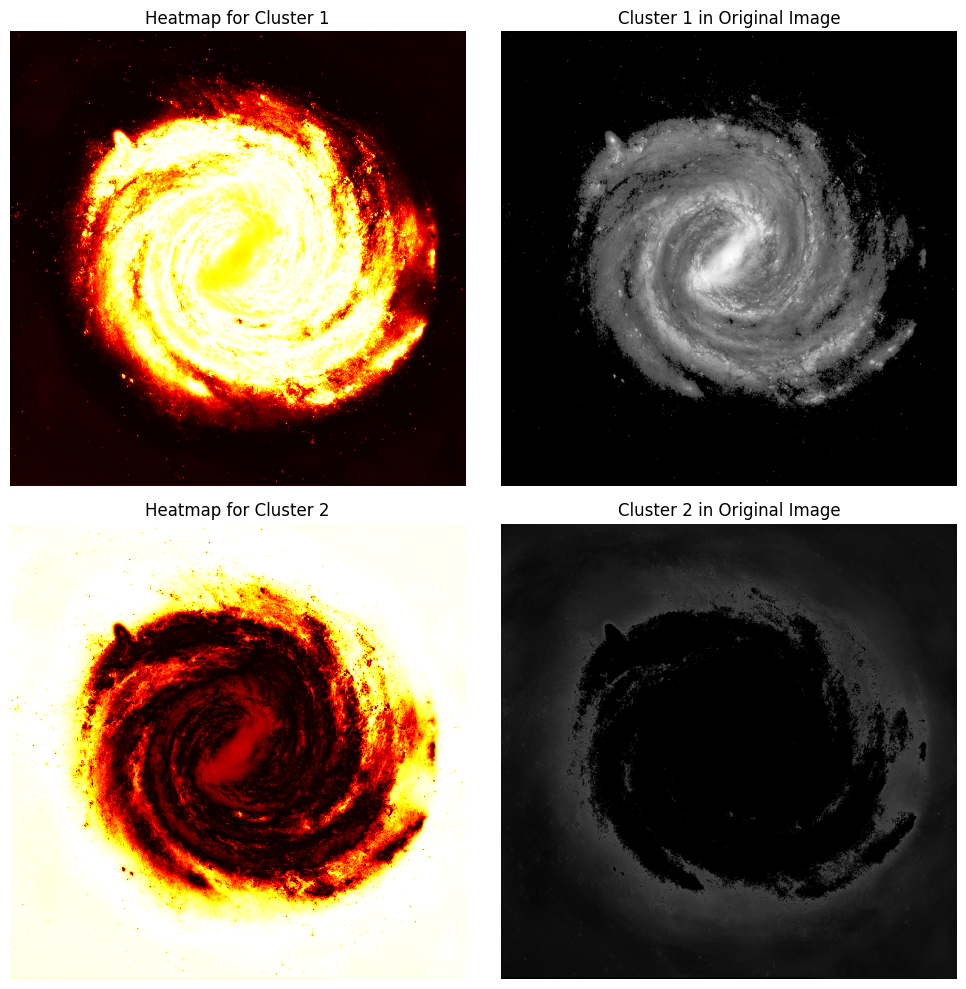

In [ ]:
# Load gray scale image
image = cv2.imread('/content/milky-way-nvg.jpg')
U, Centroids, heatmaps = fuzzy_c_means_image(image, num_clusters=2, m=2.0)
visualize_heatmaps_and_clusters(image,heatmaps)



*   Gray scale milkey-way (5 clusters)



Fuzzy C-means Iterations: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]


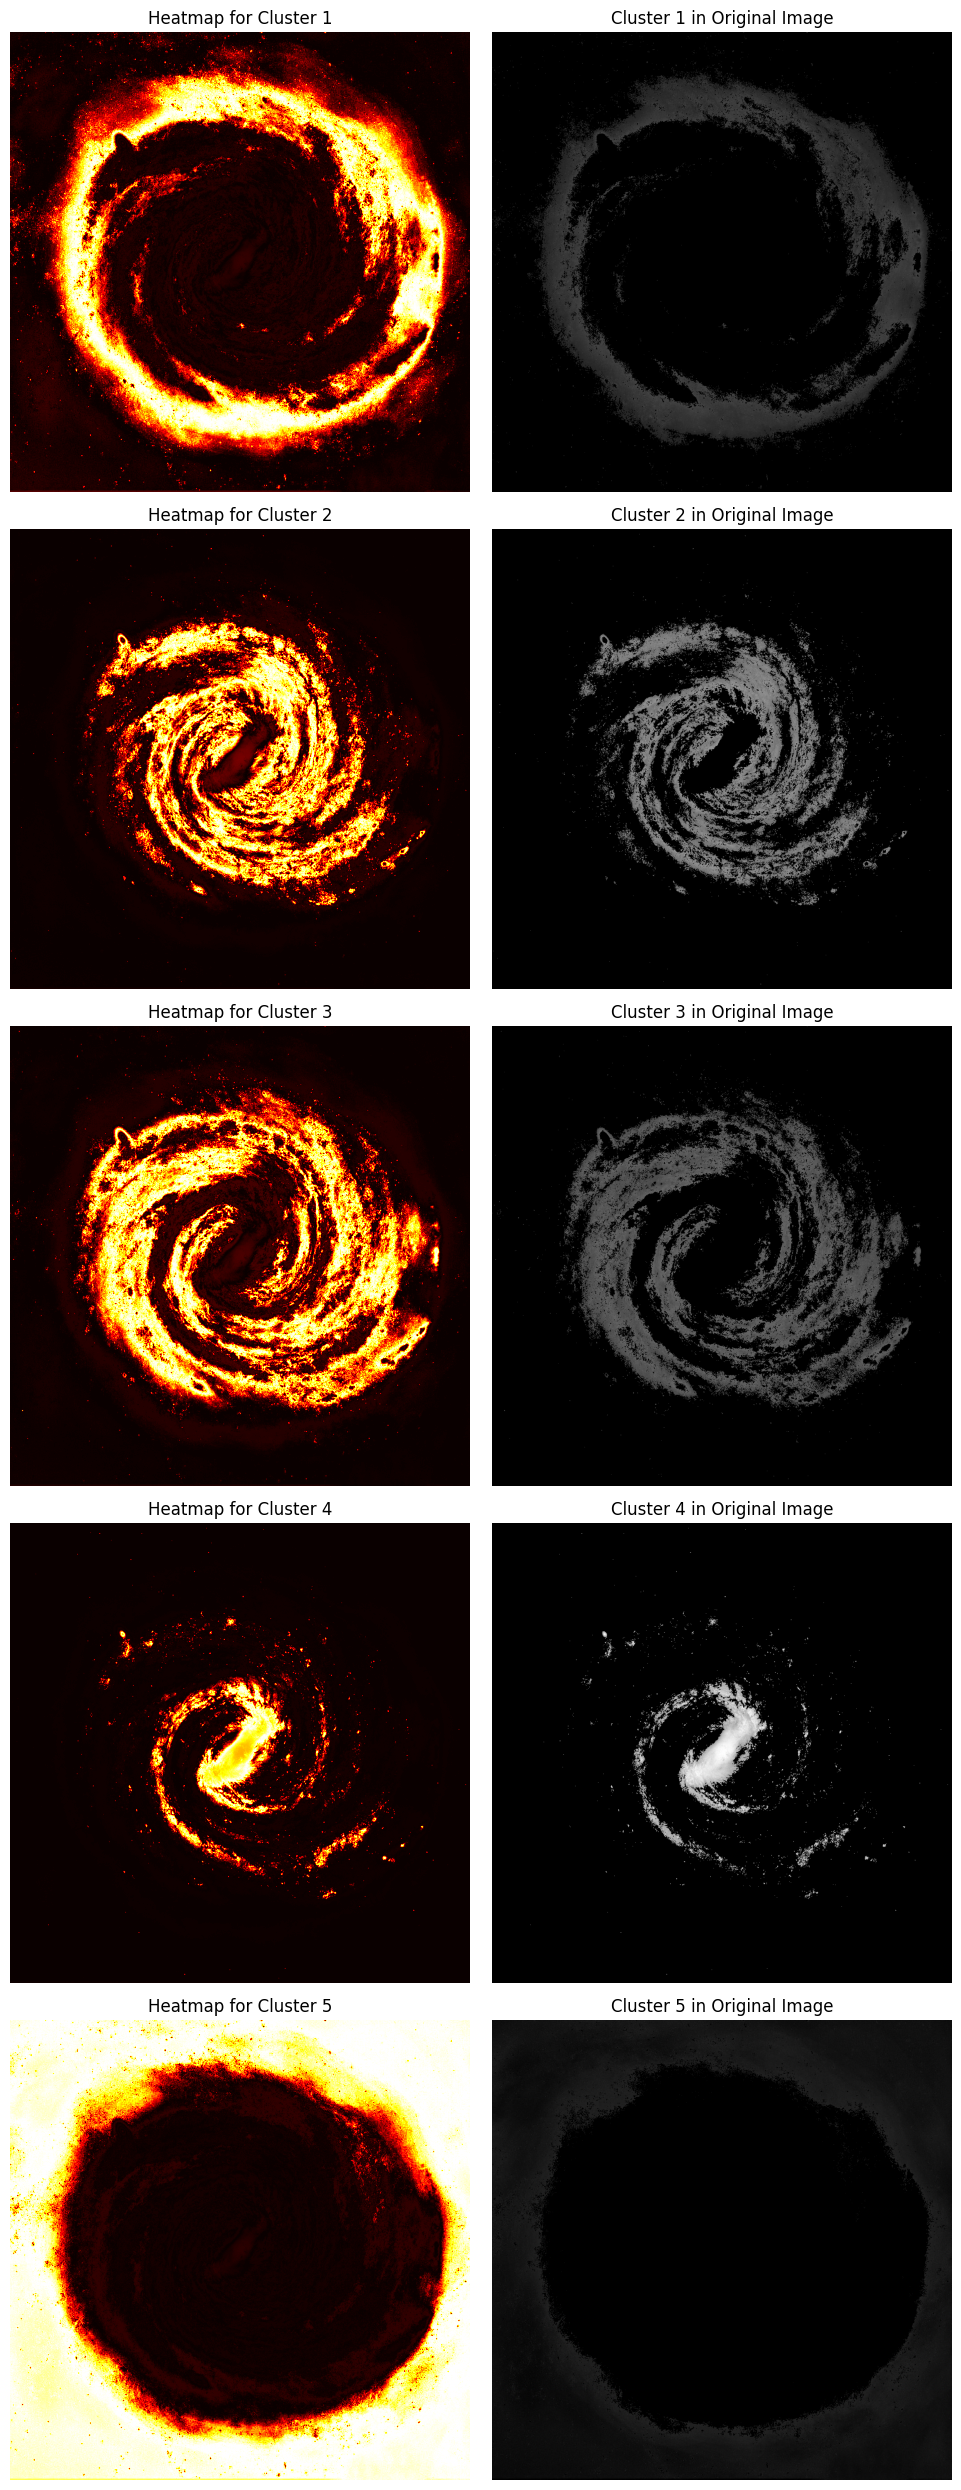

In [ ]:
# Load gray scale image
image = cv2.imread('/content/milky-way-nvg.jpg')
U, Centroids, heatmaps = fuzzy_c_means_image(image, num_clusters=5, m=2.0)
visualize_heatmaps_and_clusters(image,heatmaps)



*   RGB milkey-way (2 clusters)



Fuzzy C-means Iterations:  20%|██        | 20/100 [00:07<00:28,  2.80it/s]


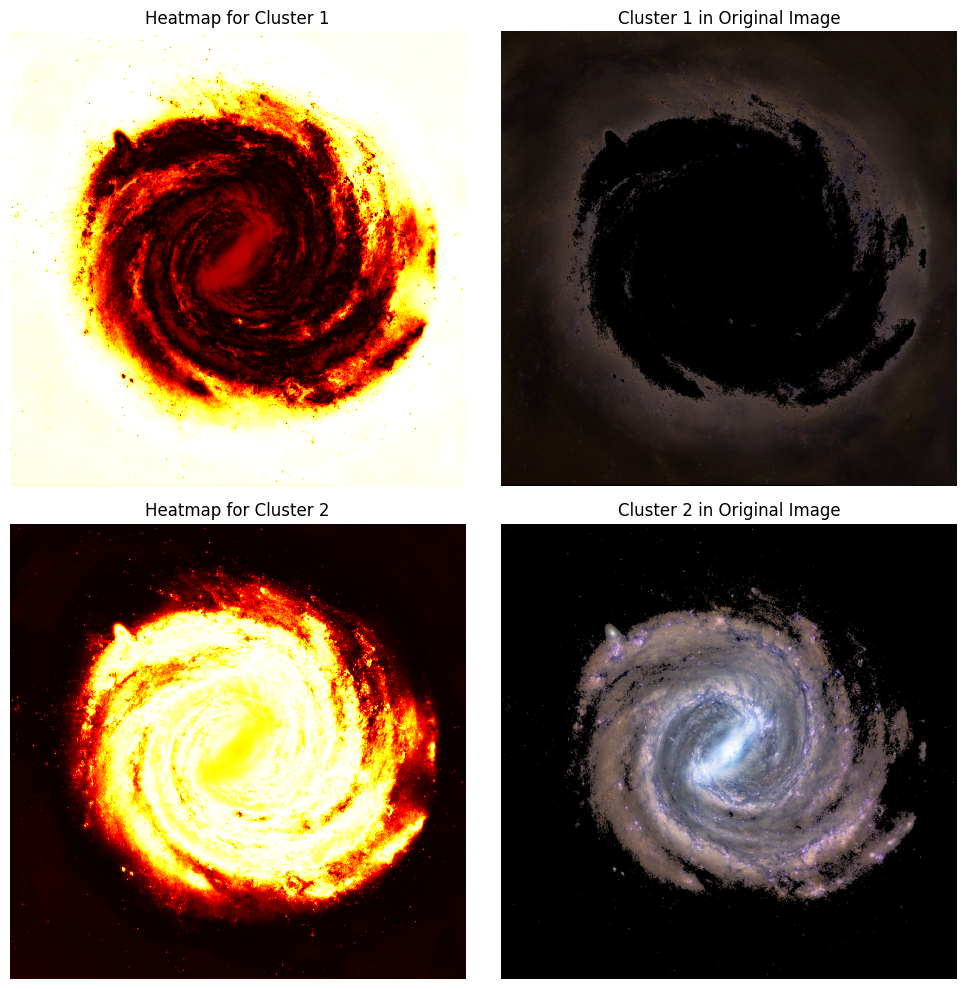

In [ ]:
# Load RGB image
image = cv2.imread('/content/milky-way.jpg')
U, Centroids, heatmaps = fuzzy_c_means_image(image, num_clusters=2, m=2.0)
visualize_heatmaps_and_clusters(image,heatmaps)

* RGB milkey-way (5 clusters)



Fuzzy C-means Iterations: 100%|██████████| 100/100 [01:06<00:00,  1.49it/s]


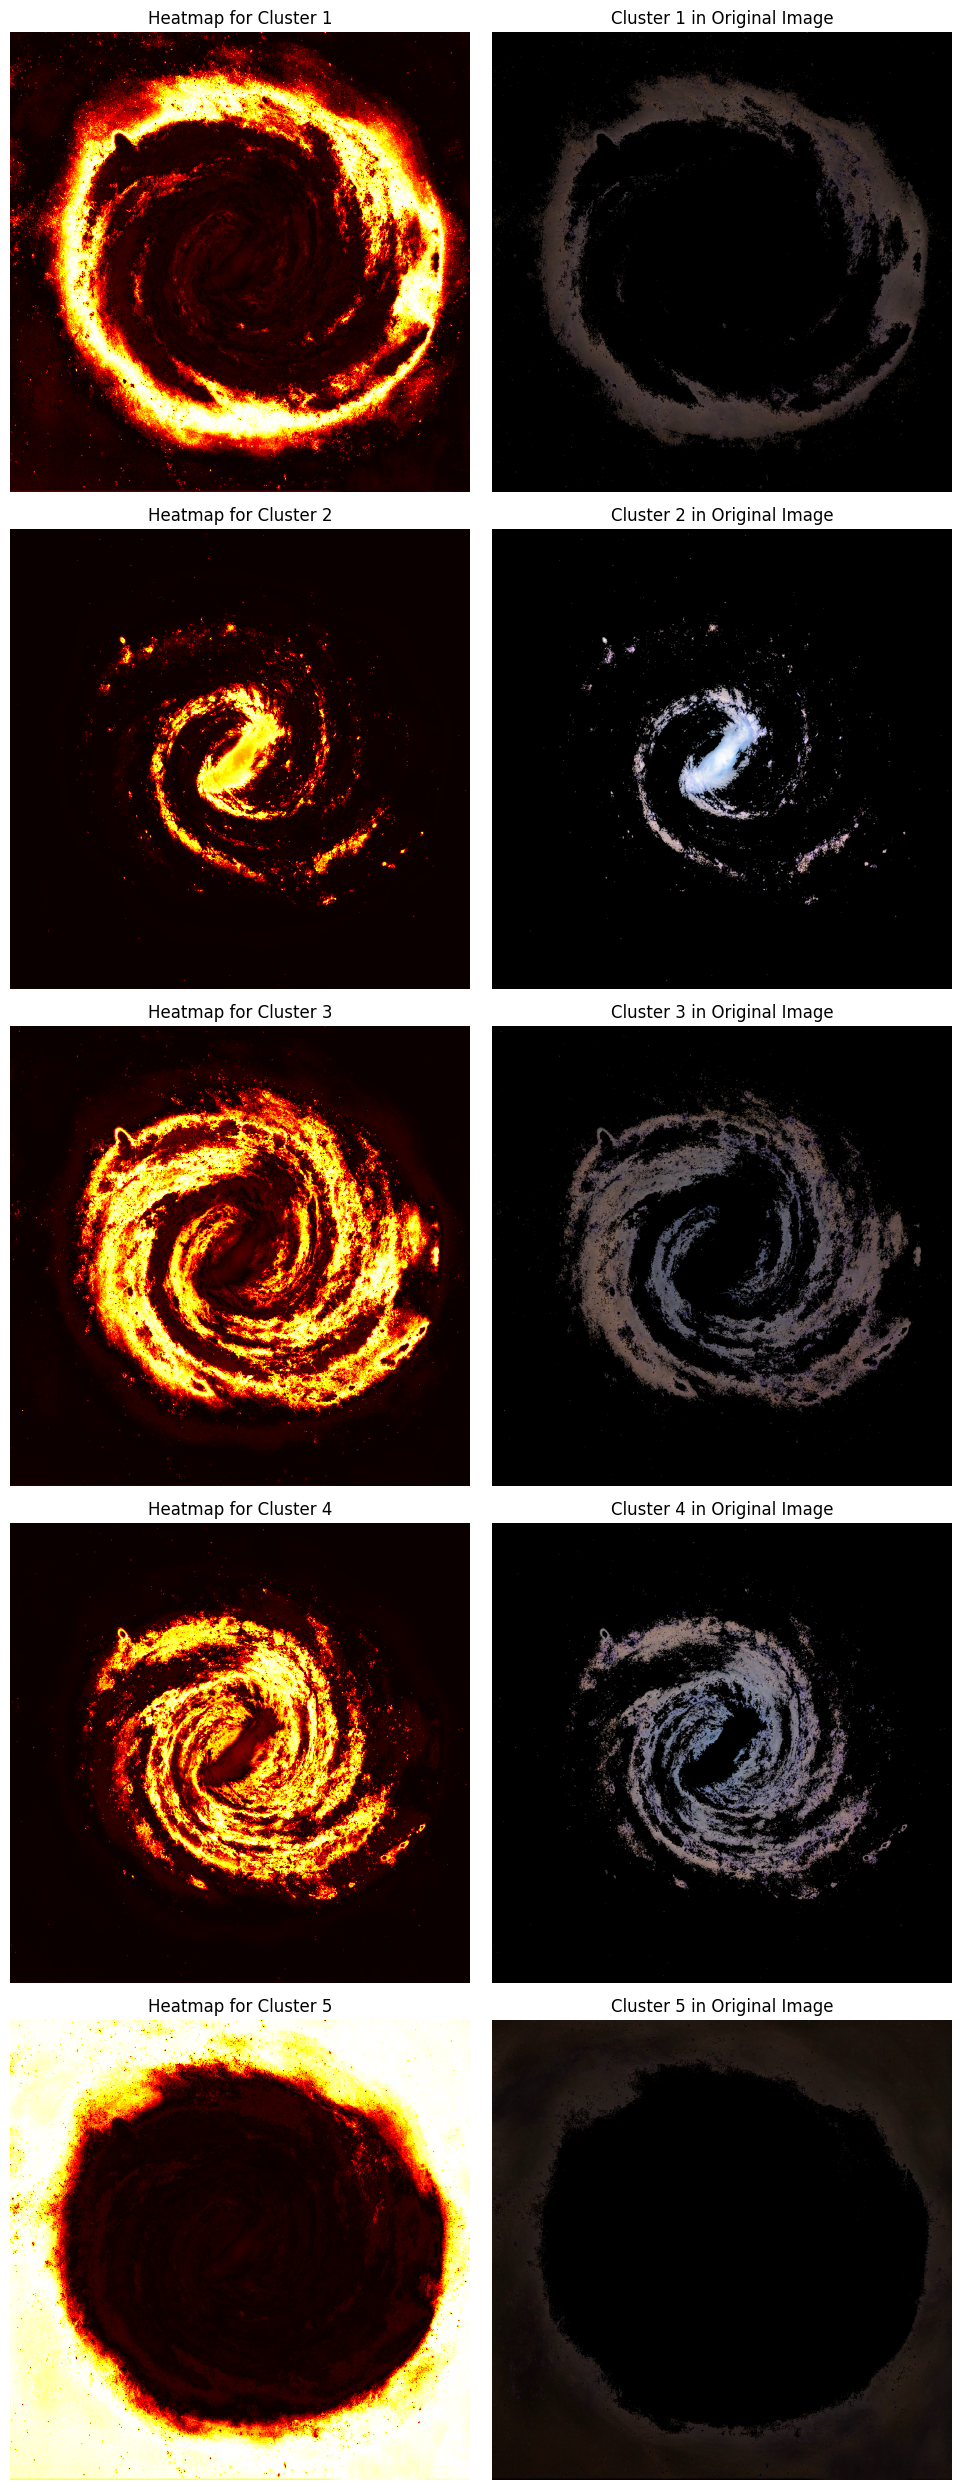

In [ ]:
# Load RGB image
image = cv2.imread('/content/milky-way.jpg')
U, Centroids, heatmaps = fuzzy_c_means_image(image, num_clusters=5, m=2.0)
visualize_heatmaps_and_clusters(image,heatmaps)

*  Cat image with 3 clusters

Fuzzy C-means Iterations:  37%|███▋      | 37/100 [03:05<05:15,  5.00s/it]


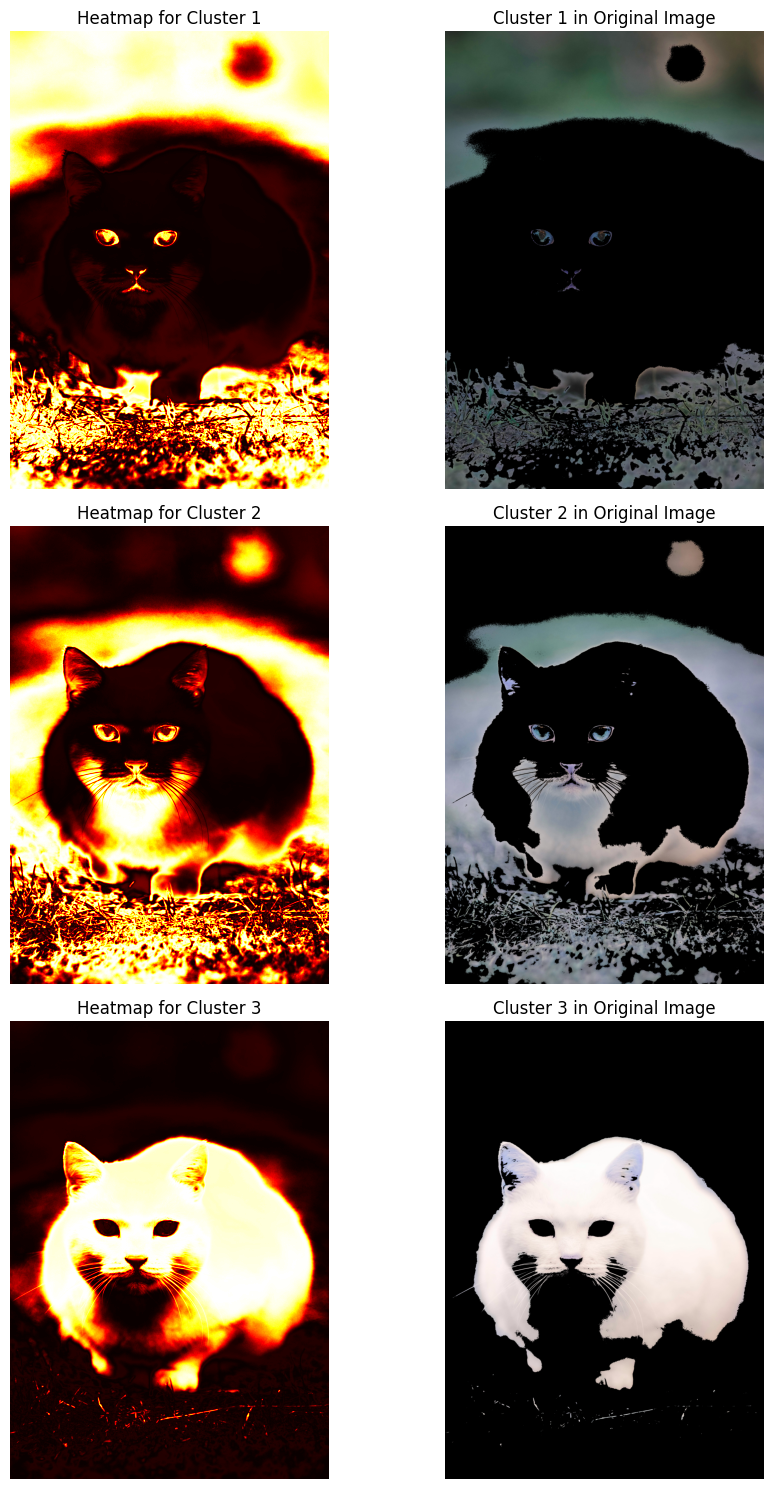

In [ ]:
image = cv2.imread('/content/cat.jpg')
U, Centroids, heatmaps = fuzzy_c_means_image(image, num_clusters=3, m=2.0)
visualize_heatmaps_and_clusters(image,heatmaps)

In [ ]:
# Function to create and display the colorized segmented image
def create_segmented_image(image, heatmaps):
    num_clusters = len(heatmaps)
    segmented_image = np.zeros_like(image)

    for k in range(num_clusters):
        # Get mask for current cluster
        cluster_mask = heatmaps[k] > 0.5
        cluster_pixels = image[cluster_mask]

        if len(cluster_pixels) > 0:
            avg_color = np.mean(cluster_pixels, axis=0).astype(int)
        else:
            avg_color = [0, 0, 0]

        segmented_image[cluster_mask] = avg_color

    return segmented_image



def visualize_segmented_result(image, heatmaps, segmented_image):
    num_clusters = len(heatmaps)
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))

    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Segmented Image")
    axes[1].axis('off')


    plt.tight_layout()
    plt.show()




*  Colorized segmented image



Fuzzy C-means Iterations:  20%|██        | 20/100 [00:08<00:32,  2.46it/s]


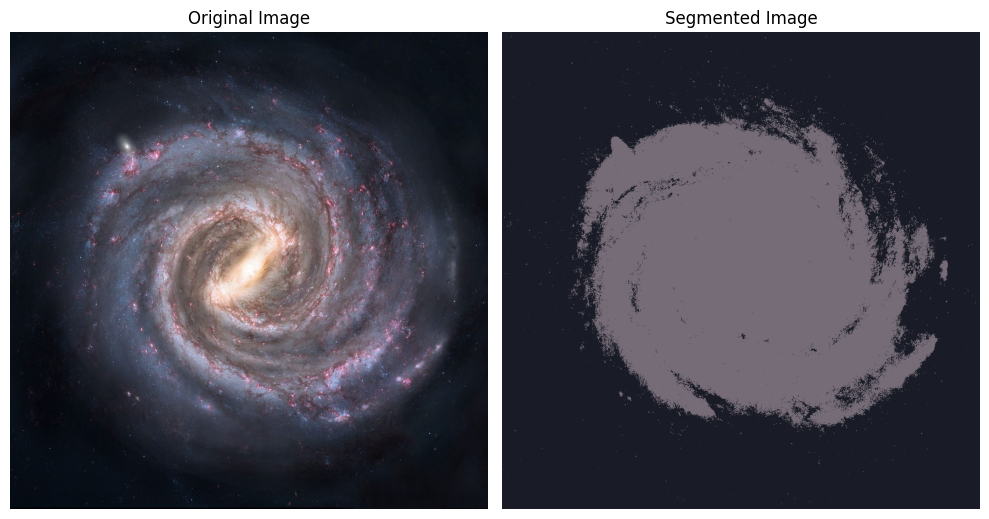

In [ ]:
image = cv2.imread('/content/milky-way.jpg')
U, Centroids, heatmaps = fuzzy_c_means_image(image, num_clusters=2, m=2.0)
segmented_image = create_segmented_image(image, heatmaps)
visualize_segmented_result(image, heatmaps, segmented_image)